In [1]:
%matplotlib inline
import numpy as np
import pdb
import matplotlib.pyplot as plt
import glob
from matplotlib.ticker import MultipleLocator
from sklearn.model_selection import train_test_split
import sklearn.datasets as datasets
import copy
from sklearn.metrics import mean_squared_error
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn import preprocessing
from sklearn.decomposition import PCA
np.random.seed(0)

In [2]:
###### handwritten digits dataset ######
digits = datasets.load_breast_cancer()
X = digits.data
X_scale = preprocessing.scale(X, with_mean=True, with_std=False)
X.shape, X_scale.shape

((569, 30), (569, 30))

In [3]:
pca = PCA(n_components=2)
X1 = copy.deepcopy(X_scale)
X1 = pca.fit_transform(X1)

X1.shape

(569, 2)

In [4]:
X1[:10,:].shape

(10, 2)

In [32]:
X2 = copy.deepcopy(X_scale)
u, s, vt = np.linalg.svd(X2, full_matrices=True)
np.allclose(X2, np.dot(u[:, :30] * s, vt))
X2 = u[:, :30] * s
X2 = X2[:, :2]
X2.shape
# X2[:10,:].shape

(569, 2)

In [38]:
left = X1[:10,:]
right = X2[:10,:]

right = right*[-1,1] # go reverse direction


(array([[1160.1425737 , -293.91754364],
        [1269.12244319,   15.63018184],
        [ 995.79388896,   39.15674324],
        [-407.18080253,  -67.38031982],
        [ 930.34118015,  189.34074158],
        [-211.59125901,  -79.87744626],
        [ 821.21089989,  -47.14966994],
        [ -25.08997758,  -74.18601461],
        [-191.29283443,  -42.12648962],
        [-238.29286318,  -65.38650692]]),
 array([[1160.1425737 , -293.91754364],
        [1269.12244319,   15.63018184],
        [ 995.79388896,   39.15674324],
        [-407.18080253,  -67.38031982],
        [ 930.34118015,  189.34074158],
        [-211.59125901,  -79.87744626],
        [ 821.21089989,  -47.14966994],
        [ -25.08997758,  -74.18601461],
        [-191.29283443,  -42.12648962],
        [-238.29286318,  -65.38650692]]))

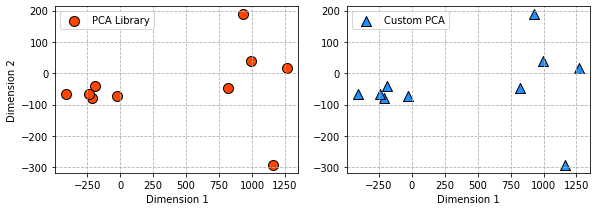

In [44]:
fig, axs = plt.subplots(1, 2, gridspec_kw={'hspace': 0.1, 'wspace': 0.2, 'bottom': 0.13, 
                                    'top': 0.9, 'right':0.995, 'left':0.17}, figsize=(9,3))

axs[0].scatter(left[:, 0], left[:, 1], label='PCA Library', marker='o', 
               s=100, edgecolor='black', color='orangered')
axs[1].scatter(right[:, 0], right[:, 1], label='Custom PCA', marker='^', 
               s=100, edgecolor='black', color='dodgerblue')

for ax in axs:
    ax.grid(which='major', axis='both', ls='dashed', zorder=0)
    ax.set_xlabel('Dimension 1')
    ax.legend()
# axs[0].set_title('Training Acc.')
# axs[1].set_title('Testing Acc.')
axs[0].set_ylabel('Dimension 2')
fig.savefig(f'plots/p2_a.png', bbox_inches='tight')